## 1. Clustering with the Iris Dataset

Using the lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.

In [1]:
import os
from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=sns.load_dataset("iris")
df.shape, \
df.head()

((150, 5),
    sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa)

In [3]:
# Lets create more columns for variety
df['sepal_area'] = df.sepal_length * df.sepal_width
df['petal_area'] = df.petal_length * df.petal_width
df['sepal_lxw_ratio'] = df.sepal_length / df.sepal_width
df['petal_lxw_ratio'] = df.petal_length / df.petal_width

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,sepal_lxw_ratio,petal_lxw_ratio
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,1.457143,7.0
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,1.633333,7.0
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,1.468750,6.5
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,1.483871,7.5
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,1.388889,7.0


In [5]:
train_and_validate, test = train_test_split(df, train_size=0.8, random_state=123)
train, validate = train_test_split(train_and_validate, train_size=0.75, random_state=123)

In [6]:
train.shape, validate.shape, test.shape

((90, 9), (30, 9), (30, 9))

In [7]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["species"]).columns.tolist()

# .copy() makes a proper copy
# this is an alternative to wrapping the scaled numpy array in a pd.Dataframe()
train_mm = train.copy()
validate_mm = validate.copy()
test_mm = test.copy()

# apply our scaler (fit only on train!)
train_mm[cols] = scaler.fit_transform(train[cols])
validate_mm[cols] = scaler.transform(validate[cols])
test_mm[cols] = scaler.transform(test[cols])

In [8]:
train_mm.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,sepal_lxw_ratio,petal_lxw_ratio
86,0.647059,0.55,0.649123,0.583333,versicolor,0.537962,0.457313,0.573559,0.078317
82,0.382353,0.35,0.508772,0.458333,versicolor,0.282717,0.300463,0.565027,0.087379
109,0.794118,0.80,0.894737,1.000000,virginica,0.795205,1.000000,0.468852,0.024466
147,0.588235,0.50,0.736842,0.791667,virginica,0.474525,0.679021,0.577049,0.036893
49,0.147059,0.65,0.070175,0.041667,setosa,0.324675,0.009265,0.154098,0.378641


In [9]:
# Fit K-Means (just on train, again!)
X = train_mm[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_mm['cluster'] = kmeans.predict(X)
train_mm.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,sepal_lxw_ratio,petal_lxw_ratio,cluster
86,0.647059,0.55,0.649123,0.583333,versicolor,0.537962,0.457313,0.573559,0.078317,2
82,0.382353,0.35,0.508772,0.458333,versicolor,0.282717,0.300463,0.565027,0.087379,2
109,0.794118,0.80,0.894737,1.000000,virginica,0.795205,1.000000,0.468852,0.024466,1
147,0.588235,0.50,0.736842,0.791667,virginica,0.474525,0.679021,0.577049,0.036893,1
49,0.147059,0.65,0.070175,0.041667,setosa,0.324675,0.009265,0.154098,0.378641,0


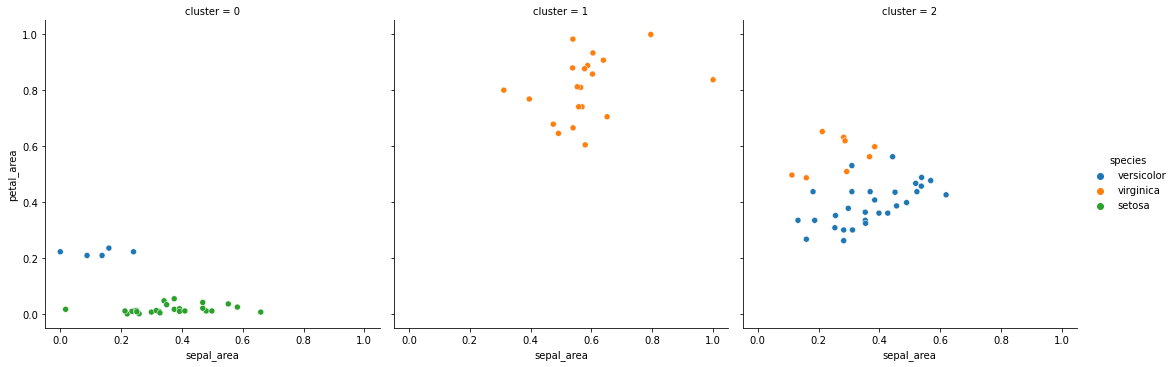

In [10]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_mm)

- Cluster 0 seems to be predicted virginica accurately enough
- The centroid of cluster 1 seems to be centered to closely to cluster 0's centroid
- The same goes for cluster 2's centroid being too close to cluster 1's

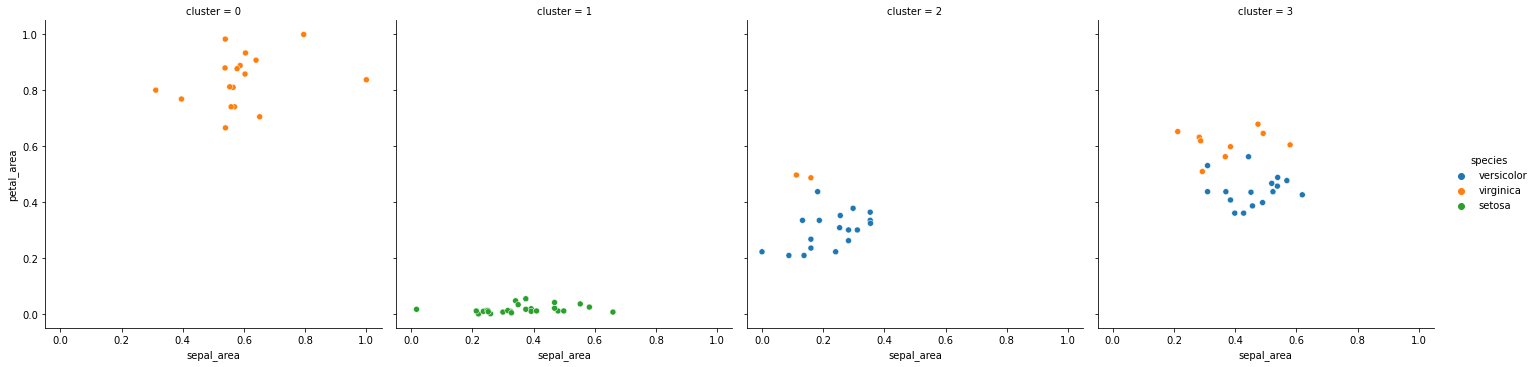

In [11]:
# Fit K-Means (just on train, again!)
X = train_mm[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_mm['cluster'] = kmeans.predict(X)
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_mm)

- With 4 centroids, clusters 0, 1, and 2 both perform well in identifying the correct species
    - cluster 3 appears to be evenly mixed betweenversicolor (bottom half) and virginica (top half)

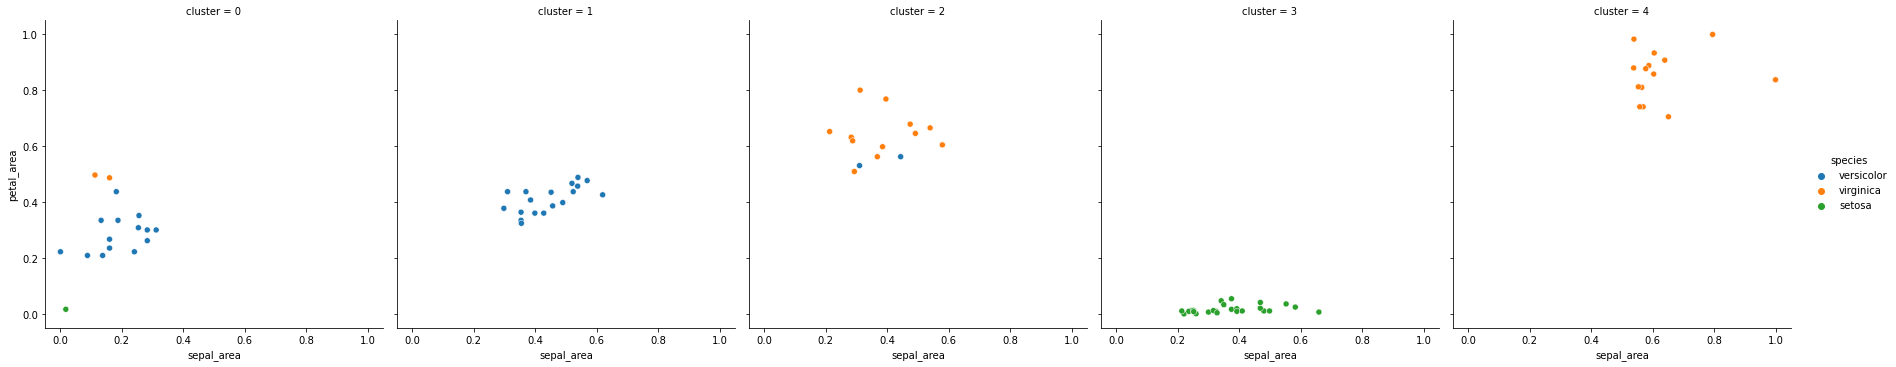

In [12]:
# Fit K-Means (just on train, again!)
X = train_mm[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_mm['cluster'] = kmeans.predict(X)
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_mm)

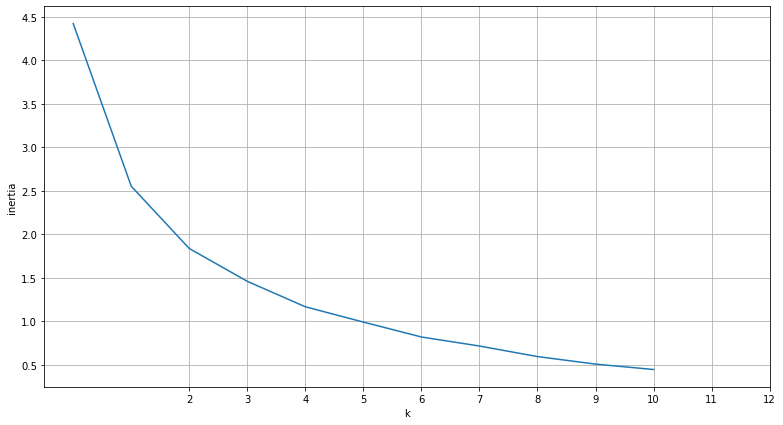

In [13]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

- k=5 appears to do a good job at identifying the species
- lets use more features and clusters!

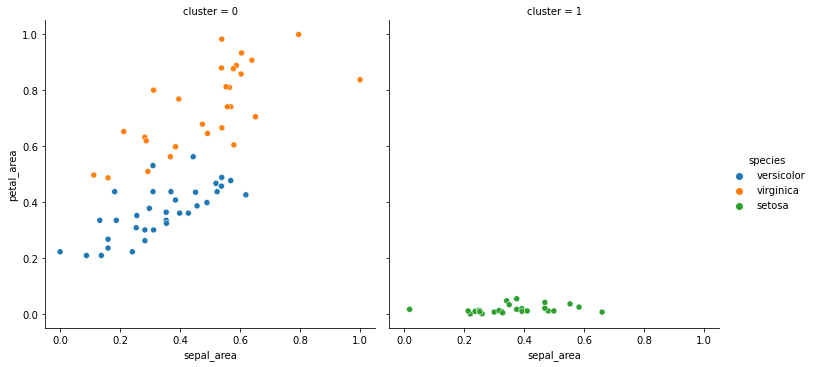

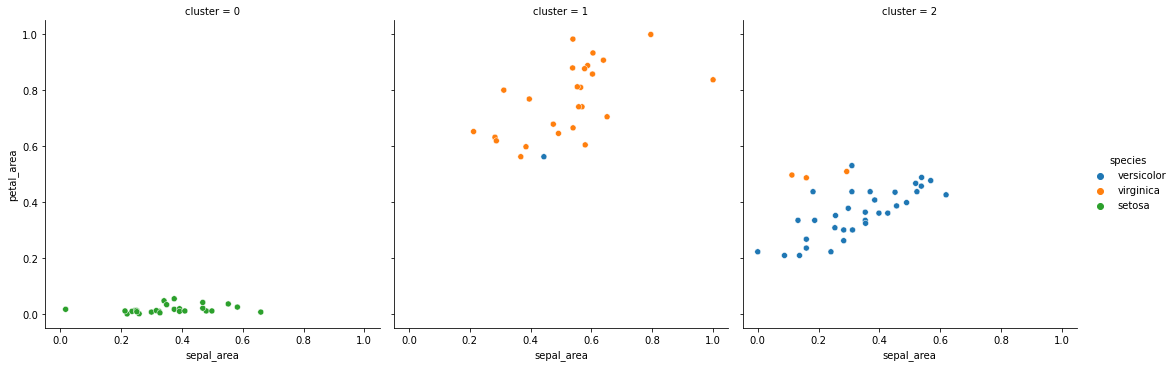

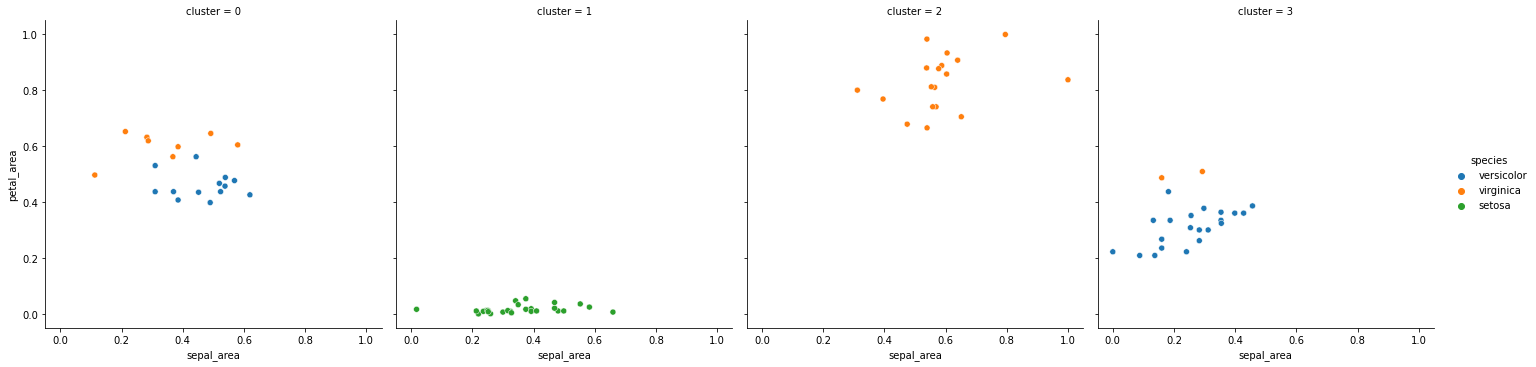

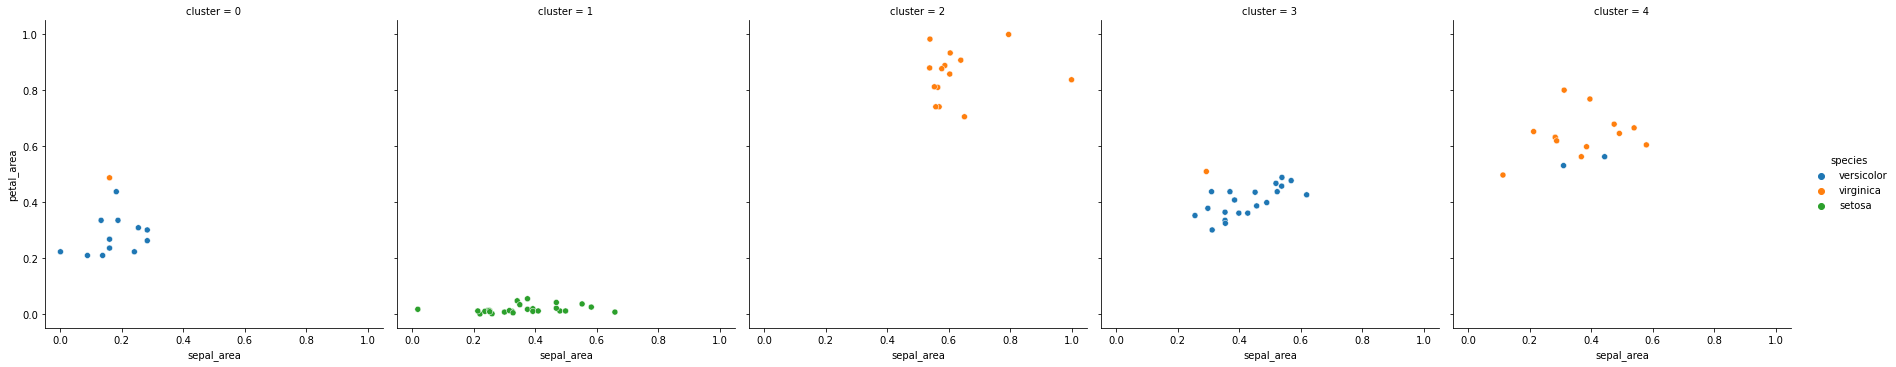

In [14]:
for k in range(2,6):
    X = train_mm[["sepal_area", "petal_area", 'petal_width', 'sepal_lxw_ratio']]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
      
    train_mm['cluster'] = kmeans.predict(X)
    sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_mm)

**Takeaways**
- When using sepal_area and petal_area as features, species was predicted best when only using 5 clusters
- With sepal_area, petal_area, petal_width,  and sepal_lxw_ratio, 3 and 5 clusters perfrom exceptionally well at predicting species.

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql("SELECT * FROM customers;", get_connection('mall_customers'))
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# First we encode gender
df.gender = df.gender.apply([lambda x: 0 if x=='Male' else 1])
df.rename(columns={'gender': 'is_female'}, inplace=True)
df.set_index('customer_id', inplace=True)

In [17]:
df.head()

,is_female,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [18]:
# Training split
train_and_validate, test = train_test_split(df, train_size=0.8, random_state=123)
train, validate = train_test_split(train_and_validate, train_size=0.75, random_state=123)

# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["is_female"]).columns.tolist()

# .copy() makes a proper copy
# this is an alternative to wrapping the scaled numpy array in a pd.Dataframe()
train_mm = train.copy()
validate_mm = validate.copy()
test_mm = test.copy()

# apply our scaler (fit only on train!)
train_mm[cols] = scaler.fit_transform(train[cols])
validate_mm[cols] = scaler.transform(validate[cols])
test_mm[cols] = scaler.transform(test[cols])

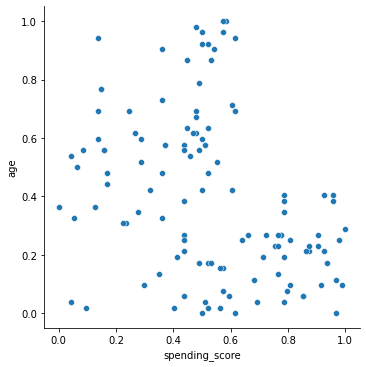

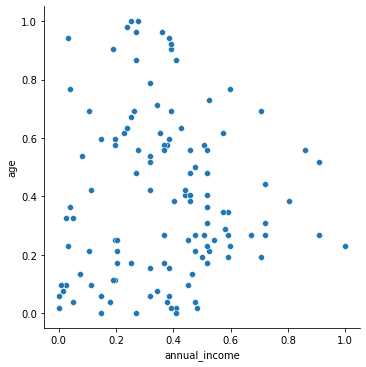

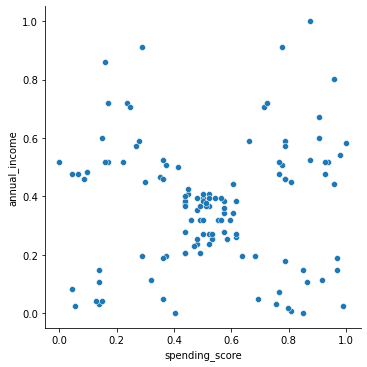

In [41]:
sns.relplot(x="spending_score", y="age", data=train_mm)

sns.relplot(x="annual_income", y="age", data=train_mm)

sns.relplot(x="spending_score", y="annual_income", data=train_mm)

Annual income and spending score appearing to be the most clustered.

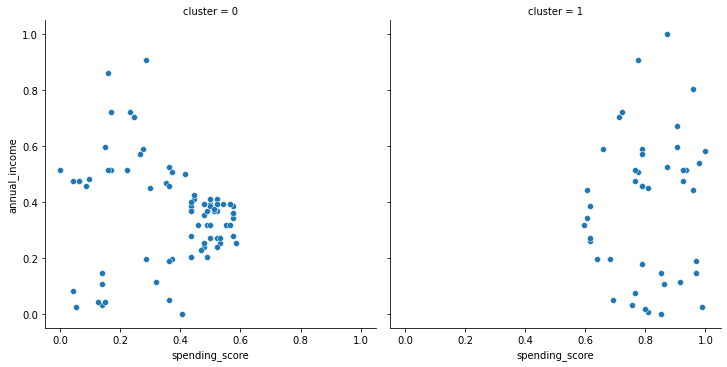

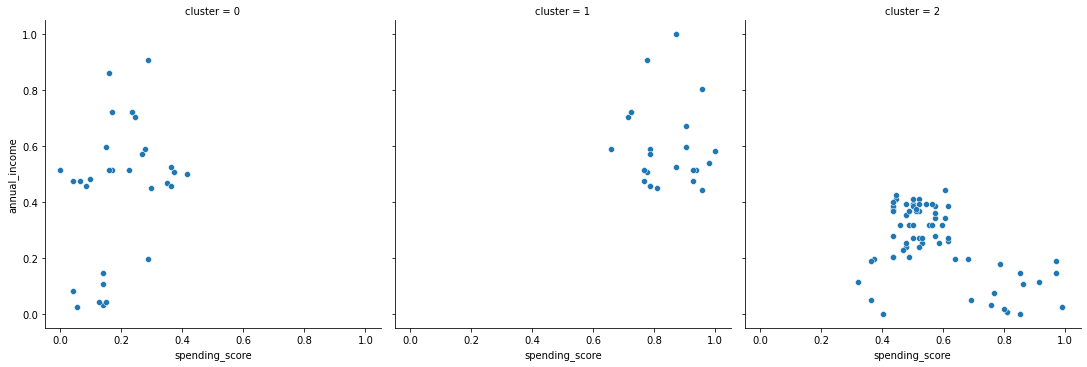

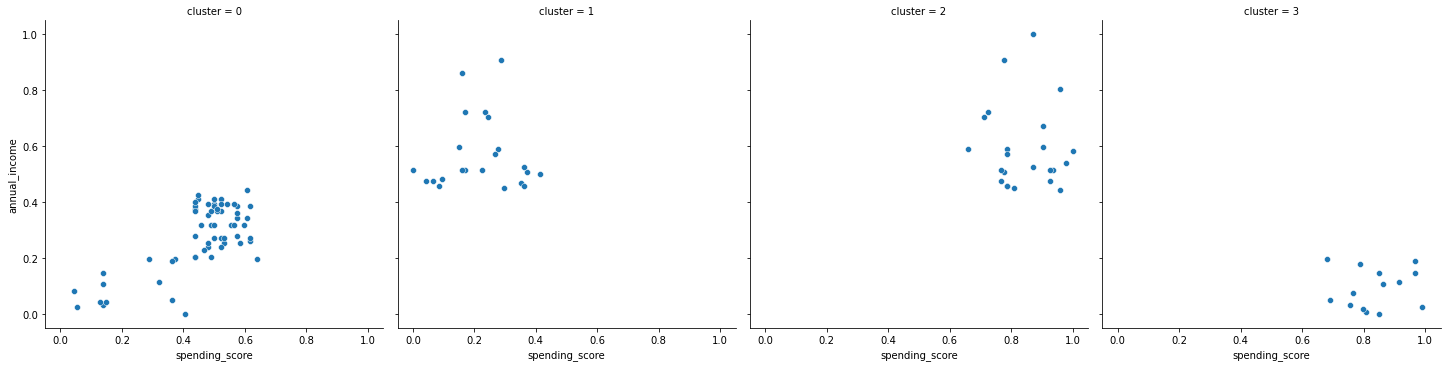

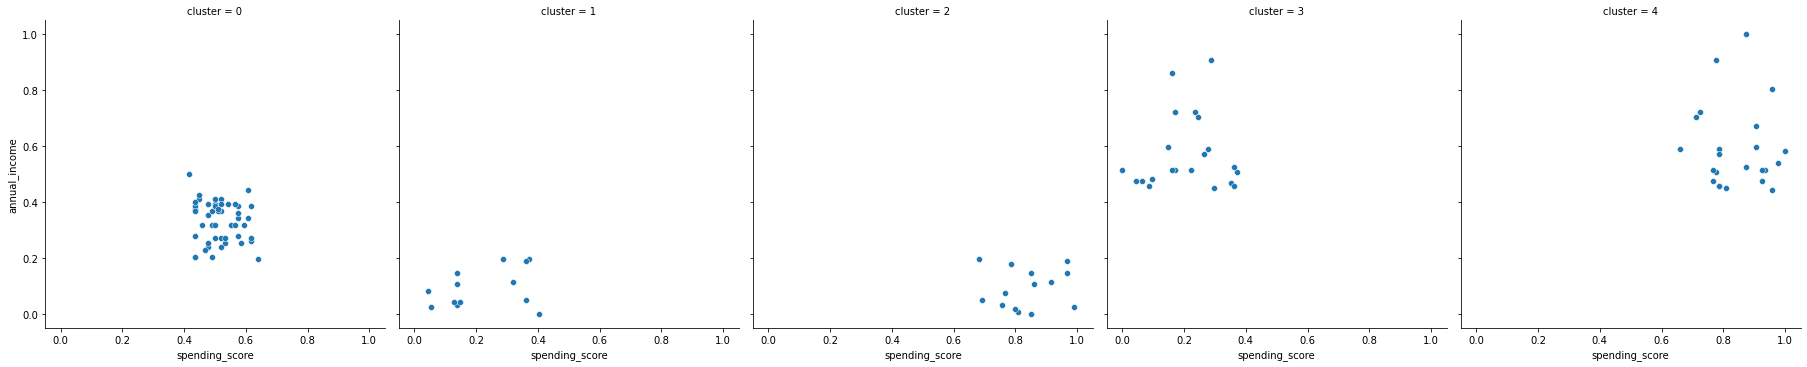

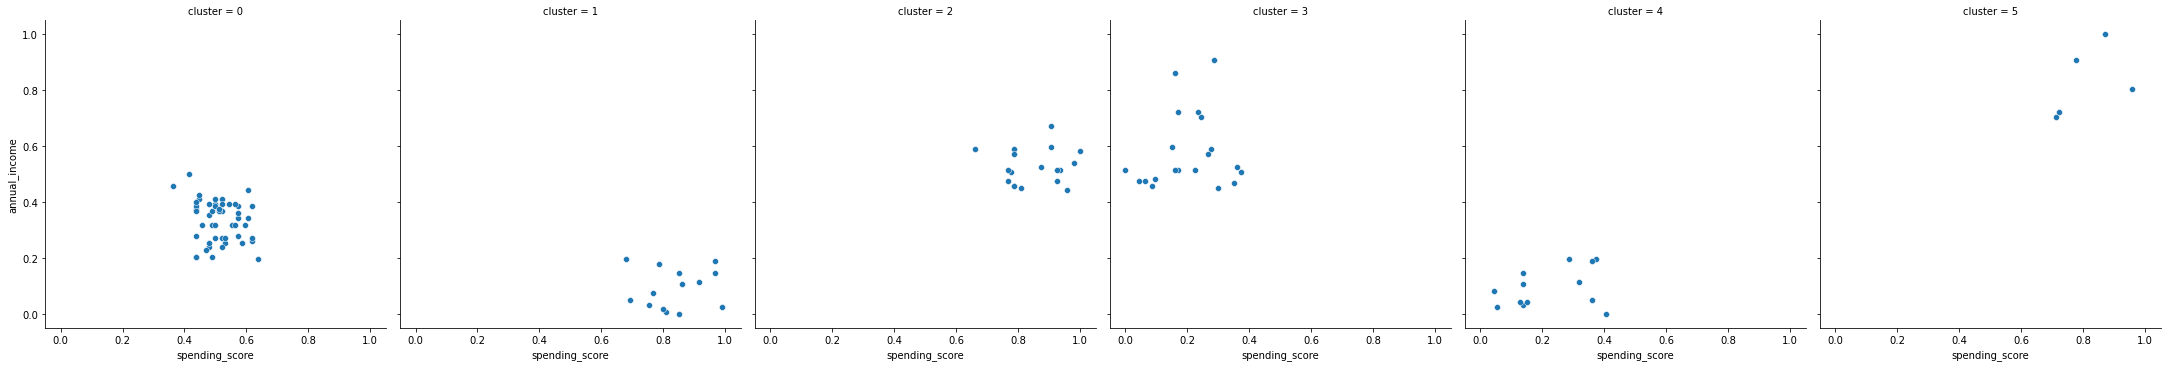

In [47]:
for k in range(2,7):
    X = train_mm[['annual_income', 'spending_score']]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    train_mm['cluster'] = kmeans.predict(X)
    sns.relplot(x="spending_score", y="annual_income", col="cluster", data=train_mm)

**Takeaways**

For annual income and spending score, k=5 appears to represent the data's apparent clusters more accurately than the other cluster amounts.

## 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

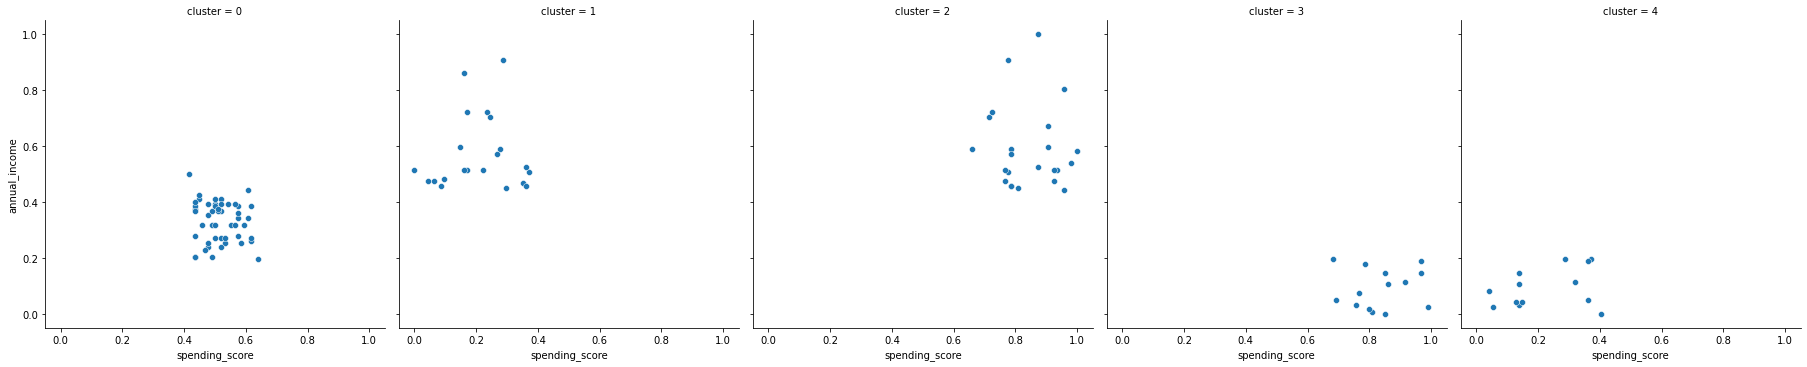

In [51]:
X = train_mm[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_mm['cluster'] = kmeans.predict(X)
sns.relplot(x="spending_score", y="annual_income", col="cluster", data=train_mm)

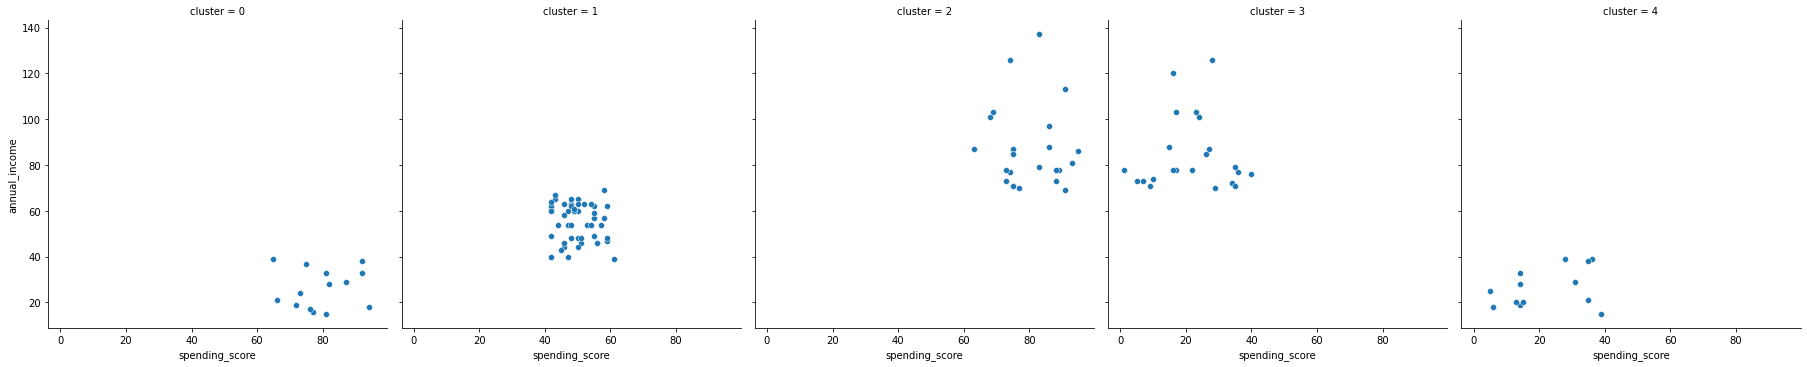

In [52]:
X = train[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
sns.relplot(x="spending_score", y="annual_income", col="cluster", data=train)

From the graphs of clustered data from the scaled and unscaled data, we can see the there are a few points that are exchanged between clusters. Depending on the target variable is and its predictions are impacted by these differences, only by comparing clusters can we determine which dataset works best with any model.

## Bonus
    a. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
    b. Visualize the data and guess the number and shape of the clusters.
    c. Implement the KMeans algorithm on unscaled data and visualize the clusters.
    d. Repeat the step above but with scaled data.
    e. Write down the takeaways from this exercise.